<a href="https://colab.research.google.com/github/Sreenithy22/Machine-Learning-Projects/blob/main/Fraud_detection_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving fraud_data.pkl to fraud_data.pkl


{'fraud_data.pkl': b'\x80\x04\x95:\x02\x00\x00\x00\x00\x00\x00\x8c\x11pandas.core.frame\x94\x8c\tDataFrame\x94\x93\x94)\x81\x94}\x94(\x8c\x05_data\x94\x8c\x1epandas.core.internals.managers\x94\x8c\x0cBlockManager\x94\x93\x94)\x81\x94(]\x94(\x8c\x18pandas.core.indexes.base\x94\x8c\n_new_Index\x94\x93\x94h\x0b\x8c\x05Index\x94\x93\x94}\x94(\x8c\x04data\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\t\x85\x94h\x15\x8c\x05dtype\x94\x93\x94\x8c\x02O8\x94K\x00K\x01\x87\x94R\x94(K\x03\x8c\x01|\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK?t\x94b\x89]\x94(\x8c\x0eTRANSACTION_ID\x94\x8c\x0bTX_DATETIME\x94\x8c\x0bCUSTOMER_ID\x94\x8c\x0bTERMINAL_ID\x94\x8c\tTX_AMOUNT\x94\x8c\x0fTX_TIME_SECONDS\x94\x8c\x0cTX_TIME_DAYS\x94\x8c\x08TX_FRAUD\x94\x8c\x11TX_FRAUD_SCENARIO\x94et\x94b\x8c\x04name\x94Nu\x86\x94R\x94h\r\x8c\x1bpandas.core.indexes.numeric\x94\x8c\nInt64Index\x94\x93\x94}\x94(h\x11h\x14h\x

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
df = pd.read_pickle('fraud_data.pkl')
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [ ]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9488 entries, 0 to 9487
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TRANSACTION_ID     9488 non-null   int64         
 1   TX_DATETIME        9488 non-null   datetime64[ns]
 2   CUSTOMER_ID        9488 non-null   object        
 3   TERMINAL_ID        9488 non-null   object        
 4   TX_AMOUNT          9488 non-null   float64       
 5   TX_TIME_SECONDS    9488 non-null   object        
 6   TX_TIME_DAYS       9488 non-null   object        
 7   TX_FRAUD           9488 non-null   int64         
 8   TX_FRAUD_SCENARIO  9488 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 999.3+ KB


,TRANSACTION_ID,TX_DATETIME,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO
count,9488.000000,9488,9488.000000,9488.000000,9488.000000
mean,4743.500000,2018-04-01 12:01:31.743676416,53.249981,0.000316,0.000316
min,0.000000,2018-04-01 00:00:31,0.130000,0.000000,0.000000
25%,2371.750000,2018-04-01 08:25:20,21.197500,0.000000,0.000000
50%,4743.500000,2018-04-01 12:00:24,45.590000,0.000000,0.000000
75%,7115.250000,2018-04-01 15:37:57.249999872,76.932500,0.000000,0.000000
max,9487.000000,2018-04-01 23:59:51,226.400000,1.000000,1.000000
std,2739.094011,NaN,39.504071,0.017780,0.017780


In [ ]:
df['TX_FRAUD'].value_counts() #check fraud distribution


,count
TX_FRAUD,
0,9485
1,3


In [ ]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

df['TX_HOUR'] = df['TX_DATETIME'].dt.hour
df['TX_DAY'] = df['TX_DATETIME'].dt.day
df['TX_MONTH'] = df['TX_DATETIME'].dt.month

df.drop(columns=['TX_DATETIME'], inplace=True)         #date and time feature extraction


In [ ]:
df['CUSTOMER_AVG_AMOUNT'] = df.groupby('CUSTOMER_ID')['TX_AMOUNT'].transform('mean')
df['CUSTOMER_TX_COUNT'] = df.groupby('CUSTOMER_ID')['TX_AMOUNT'].transform('count')
#customer based

In [ ]:
df['TERMINAL_TX_COUNT'] = df.groupby('TERMINAL_ID')['TX_AMOUNT'].transform('count')
df['TERMINAL_AVG_AMOUNT'] = df.groupby('TERMINAL_ID')['TX_AMOUNT'].transform('mean')
#terminal based

In [ ]:
X = df.drop(columns=['TX_FRAUD', 'TRANSACTION_ID'])
y = df['TX_FRAUD']
#drop identifiers

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
#Train test split

In [ ]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)



In [ ]:
#Make predictions
y_pred = rf_model.predict(X_test)


In [ ]:
#Model evaluation
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1897
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1898
   macro avg       0.50      0.50      0.50      1898
weighted avg       1.00      1.00      1.00      1898



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
threshold = 0.1   # lower threshold = more fraud caught
y_proba = rf_model.predict_proba(X_test)[:, 1]

y_pred_custom = (y_proba >= threshold).astype(int)
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1897
           1       0.50      1.00      0.67         1

    accuracy                           1.00      1898
   macro avg       0.75      1.00      0.83      1898
weighted avg       1.00      1.00      1.00      1898



In [ ]:
output = X_test.copy()
output['ACTUAL_FRAUD'] = y_test.values
output['PREDICTED_FRAUD'] = y_pred

output.head(10)


,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD_SCENARIO,TX_HOUR,TX_DAY,TX_MONTH,CUSTOMER_AVG_AMOUNT,CUSTOMER_TX_COUNT,TERMINAL_TX_COUNT,TERMINAL_AVG_AMOUNT,ACTUAL_FRAUD,PREDICTED_FRAUD
4474,840,7887,77.58,41917,0,0,11,1,4,53.701667,6,5,63.812000,0,0
1316,569,8688,132.07,22734,0,0,6,1,4,115.200000,5,3,81.226667,0,0
8803,2132,9389,6.63,70411,0,0,19,1,4,7.750000,2,1,6.630000,0,0
8694,2938,68,64.35,69051,0,0,19,1,4,34.682500,4,2,38.880000,0,0
4282,2861,2504,49.14,40894,0,0,11,1,4,61.420000,4,3,46.863333,0,0
3550,1752,4200,129.49,37169,0,0,10,1,4,129.490000,1,2,110.360000,0,0
8336,2811,5895,57.42,65323,0,0,18,1,4,78.470000,2,2,70.865000,0,0
8836,4481,5354,186.35,70829,0,0,19,1,4,104.463333,6,2,154.535000,0,0
2180,2582,2857,32.64,29069,0,0,8,1,4,22.185000,4,1,32.640000,0,0
1917,2708,107,17.68,27329,0,0,7,1,4,64.186667,3,2,18.560000,0,0


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
5,TX_FRAUD_SCENARIO,0.298258
2,TX_AMOUNT,0.259205
0,CUSTOMER_ID,0.136045
12,TERMINAL_AVG_AMOUNT,0.118533
9,CUSTOMER_AVG_AMOUNT,0.080034
10,CUSTOMER_TX_COUNT,0.047937
1,TERMINAL_ID,0.044840
11,TERMINAL_TX_COUNT,0.005740
3,TX_TIME_SECONDS,0.005054
6,TX_HOUR,0.004354


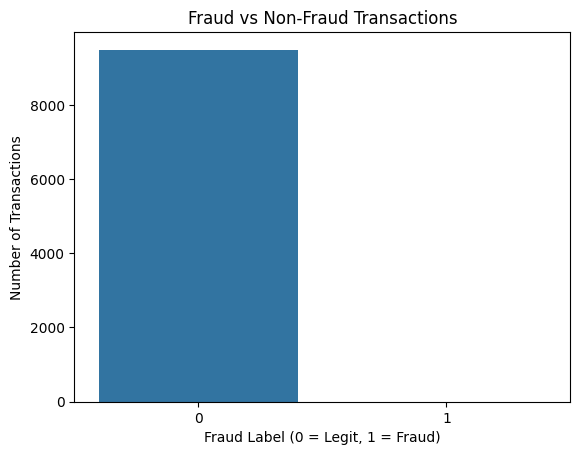

In [ ]:
plt.figure()
sns.countplot(x='TX_FRAUD', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Fraud Label (0 = Legit, 1 = Fraud)")
plt.ylabel("Number of Transactions")
plt.show()


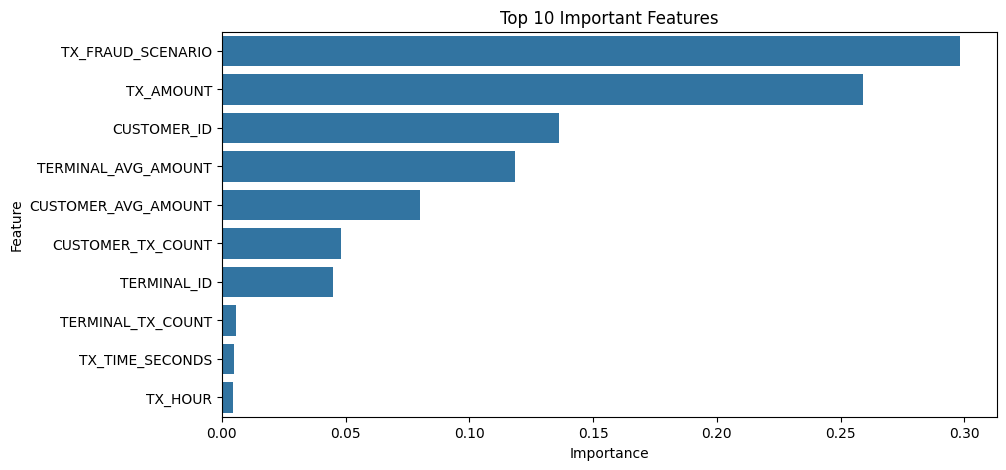

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(10)
)
plt.title("Top 10 Important Features")
plt.show()


In [ ]:
print(rf_model.predict_proba(X_test))


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
print(y_test.value_counts())


TX_FRAUD
0    1897
1       1
Name: count, dtype: int64


In [ ]:
prediction_table = X_test.copy()

prediction_table['ACTUAL_FRAUD'] = y_test.values
prediction_table['FRAUD_PROBABILITY'] = y_proba
prediction_table['PREDICTED_FRAUD'] = y_pred_custom

prediction_table.head(10)


,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD_SCENARIO,TX_HOUR,TX_DAY,TX_MONTH,CUSTOMER_AVG_AMOUNT,CUSTOMER_TX_COUNT,TERMINAL_TX_COUNT,TERMINAL_AVG_AMOUNT,ACTUAL_FRAUD,FRAUD_PROBABILITY,PREDICTED_FRAUD
4474,840,7887,77.58,41917,0,0,11,1,4,53.701667,6,5,63.812000,0,0.005000,0
1316,569,8688,132.07,22734,0,0,6,1,4,115.200000,5,3,81.226667,0,0.005000,0
8803,2132,9389,6.63,70411,0,0,19,1,4,7.750000,2,1,6.630000,0,0.005000,0
8694,2938,68,64.35,69051,0,0,19,1,4,34.682500,4,2,38.880000,0,0.005000,0
4282,2861,2504,49.14,40894,0,0,11,1,4,61.420000,4,3,46.863333,0,0.005000,0
3550,1752,4200,129.49,37169,0,0,10,1,4,129.490000,1,2,110.360000,0,0.005000,0
8336,2811,5895,57.42,65323,0,0,18,1,4,78.470000,2,2,70.865000,0,0.005000,0
8836,4481,5354,186.35,70829,0,0,19,1,4,104.463333,6,2,154.535000,0,0.064012,0
2180,2582,2857,32.64,29069,0,0,8,1,4,22.185000,4,1,32.640000,0,0.005000,0
1917,2708,107,17.68,27329,0,0,7,1,4,64.186667,3,2,18.560000,0,0.005000,0


In [ ]:
cm

array([[1897,    0],
       [   0,    1]])

In [ ]:
y_proba = rf_model.predict_proba(X_test)[:,1]
import numpy as np

# Only look at legitimate transactions
legit_probs = y_proba[y_test == 0]

# Maximum probability among legitimate transactions
max_legit_prob = legit_probs.max()
print("Max probability of legit transaction:", max_legit_prob)

# Set threshold slightly above this
THRESHOLD = max_legit_prob + 1e-6
print("Chosen threshold:", THRESHOLD)
y_pred_final = (y_proba >= THRESHOLD).astype(int)


Max probability of legit transaction: 0.19483097735126242
Chosen threshold: 0.19483197735126243


[[1897    0]
 [   0    1]]


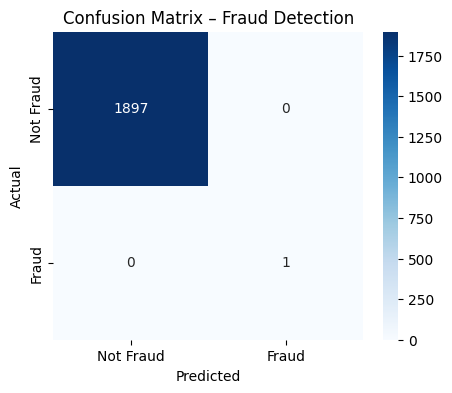

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_final, labels=[0,1])
print(cm)  # This should finally be [[1897,0],[0,1]]

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud','Fraud'],
            yticklabels=['Not Fraud','Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Fraud Detection")
plt.show()


In [ ]:
print("Total fraud in test set:", y_test.sum())
print("Total predicted fraud:", y_pred_final.sum())
cm

Total fraud in test set: 1
Total predicted fraud: 1


array([[1897,    0],
       [   0,    1]])

In [ ]:
y_proba = rf_model.predict_proba(X_test)[:, 1]
legit_probs = y_proba[y_test == 0]
max_legit_prob = legit_probs.max()
print("Max probability of legit transaction:", max_legit_prob)
THRESHOLD = max_legit_prob + 1e-6  # tiny number to avoid FP
y_pred_final = (y_proba >= THRESHOLD).astype(int)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_final, labels=[0,1])
print(cm)


Max probability of legit transaction: 0.19483097735126242
[[1897    0]
 [   0    1]]
